In [4]:
# Import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Modify the transform to handle grayscale images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize for grayscale
])

In [19]:
# TODO: Download and load the training and test sets using torchvision.datasets

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)



In [24]:
# Define the neural network model
import torch
import torch.nn as nn

# Define the neural network model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        # Define the layers
        self.flatten = nn.Flatten()  # Flatten the input
        # Change input features to match MNIST image size (28x28=784)
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer (image flattened)
        self.fc2 = nn.Linear(128, 64)           # Hidden layer
        self.fc3 = nn.Linear(64, 10)            # Output layer (10 classes)
        self.relu = nn.ReLU()  # ReLU activation function

    def forward(self, x):
        # Forward pass
        x = self.flatten(x)   # Flatten the input image
        x = self.relu(self.fc1(x))  # First hidden layer with ReLU
        x = self.relu(self.fc2(x))  # Second hidden layer with ReLU
        x = self.fc3(x)  # Output layer (logits)
        return x

# Example usage:
# model = ANN()
# print(model)

In [25]:
# Initialize the ANN model, loss function, and optimizer
model_ann = ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ann.parameters(), lr=0.001)

In [26]:
# Training the network
num_epochs = 5
ls_losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # TODO: Move images and labels to the device
        images = images.to(device)
        labels = labels.to(device)
        # Forward pass
        outputs = model_ann(images)
        loss = criterion(outputs, labels)
        ls_losses.append(loss.item())
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/938], Loss: 0.4996
Epoch [1/5], Step [200/938], Loss: 0.4114
Epoch [1/5], Step [300/938], Loss: 0.5369
Epoch [1/5], Step [400/938], Loss: 0.4435
Epoch [1/5], Step [500/938], Loss: 0.2492
Epoch [1/5], Step [600/938], Loss: 0.1563
Epoch [1/5], Step [700/938], Loss: 0.2631
Epoch [1/5], Step [800/938], Loss: 0.2788
Epoch [1/5], Step [900/938], Loss: 0.1518
Epoch [2/5], Step [100/938], Loss: 0.2977
Epoch [2/5], Step [200/938], Loss: 0.2419
Epoch [2/5], Step [300/938], Loss: 0.3225
Epoch [2/5], Step [400/938], Loss: 0.0526
Epoch [2/5], Step [500/938], Loss: 0.1800
Epoch [2/5], Step [600/938], Loss: 0.0718
Epoch [2/5], Step [700/938], Loss: 0.0934
Epoch [2/5], Step [800/938], Loss: 0.2451
Epoch [2/5], Step [900/938], Loss: 0.1495
Epoch [3/5], Step [100/938], Loss: 0.1126
Epoch [3/5], Step [200/938], Loss: 0.0560
Epoch [3/5], Step [300/938], Loss: 0.1562
Epoch [3/5], Step [400/938], Loss: 0.1568
Epoch [3/5], Step [500/938], Loss: 0.0393
Epoch [3/5], Step [600/938], Loss:

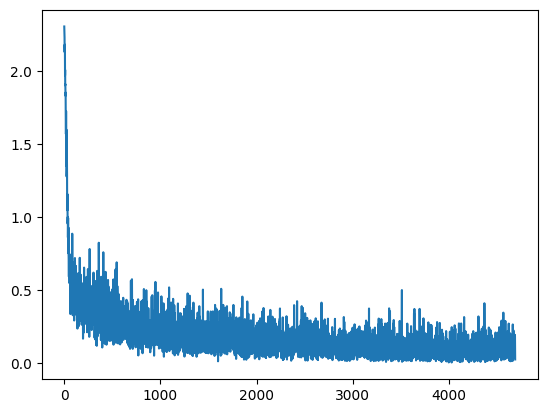

In [41]:
# Plot Losses
x_axis = np.arange(0, len(ls_losses), 1)
plt.plot(x_axis, ls_losses)
plt.xlabel = "Sample"
plt.ylabel = "Loss"

In [39]:
# Test the model
model_ann.eval()
all_preds_ann = []
all_labels_ann = []

with torch.no_grad():
    for images, labels in test_loader:

        images = images.to(device)
        labels = labels.to(device)

        outputs = model_ann(images)

        _, predicted = torch.max(outputs.data, 1)
        all_preds_ann.extend(predicted.cpu().numpy())
        all_labels_ann.extend(labels.cpu().numpy())

accuracy_ann = accuracy_score(all_labels_ann, all_preds_ann)
precision_ann = precision_score(all_labels_ann, all_preds_ann, average='weighted')
recall_ann = recall_score(all_labels_ann, all_preds_ann, average='weighted')
f1_ann = f1_score(all_labels_ann, all_preds_ann, average='weighted')


print(f"ANN Accuracy: {accuracy_ann:.4f}")
print(f"ANN Precision: {precision_ann:.4f}")
print(f"ANN Recall: {recall_ann:.4f}")
print(f"ANN F1-Score: {f1_ann:.4f}")


ANN Accuracy: 0.9678
ANN Precision: 0.9682
ANN Recall: 0.9678
ANN F1-Score: 0.9678


In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Define the CNN layers (Conv2D, MaxPool, Fully Connected)
        # Change the input channel of conv1 to 1 to match the input image
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # Input: 1 channel (grayscale), 32 filters
        self.pool = nn.MaxPool2d(2, 2)  # MaxPool with kernel size 2x2 and stride 2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # 64 filters

        # Assuming input images are 32x32 (like CIFAR-10 dataset)
        #Adjust the fc1 layer to match the reduced image dimenstions
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Flattened input: 64 channels * 8x8 feature maps
        self.fc2 = nn.Linear(128, 10)  # Output layer for 10 classes

    def forward(self, x):
        # Apply the first conv layer, ReLU, and max-pooling
        x = self.pool(F.relu(self.conv1(x)))

        # Apply the second conv layer, ReLU, and max-pooling
        x = self.pool(F.relu(self.conv2(x)))

        # Flatten the tensor for the fully connected layer
        #Adjust the view function to match the reduced image dimenstions
        x = x.view(-1, 64 * 7 * 7)

        # Apply the first fully connected layer with ReLU activation
        x = F.relu(self.fc1(x))

        # Apply the output layer (logits for 10 classes)
        x = self.fc2(x)
        return x

In [35]:
# Initialize the CNN model, loss function, and optimizer
model_cnn = CNN().to(device)  # Assuming CNN() is your defined CNN model
criterion = nn.CrossEntropyLoss()  # Loss function for classification
optimizer = torch.optim.Adam(model_cnn.parameters(), lr=0.001)  # Optimizer

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move images and labels to the device (GPU or CPU)
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass through the CNN
        outputs = model_cnn(images)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()  # Clear gradients
        loss.backward()  # Compute gradients
        optimizer.step()  # Update model parameters

        # Print progress every 100 steps
        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/5], Step [100/938], Loss: 0.3406
Epoch [1/5], Step [200/938], Loss: 0.1197
Epoch [1/5], Step [300/938], Loss: 0.0587
Epoch [1/5], Step [400/938], Loss: 0.0744
Epoch [1/5], Step [500/938], Loss: 0.0771
Epoch [1/5], Step [600/938], Loss: 0.0085
Epoch [1/5], Step [700/938], Loss: 0.2392
Epoch [1/5], Step [800/938], Loss: 0.0496
Epoch [1/5], Step [900/938], Loss: 0.0513
Epoch [2/5], Step [100/938], Loss: 0.0135
Epoch [2/5], Step [200/938], Loss: 0.0203
Epoch [2/5], Step [300/938], Loss: 0.0114
Epoch [2/5], Step [400/938], Loss: 0.0276
Epoch [2/5], Step [500/938], Loss: 0.0212
Epoch [2/5], Step [600/938], Loss: 0.0305
Epoch [2/5], Step [700/938], Loss: 0.0310
Epoch [2/5], Step [800/938], Loss: 0.1066
Epoch [2/5], Step [900/938], Loss: 0.1076
Epoch [3/5], Step [100/938], Loss: 0.0439
Epoch [3/5], Step [200/938], Loss: 0.0437
Epoch [3/5], Step [300/938], Loss: 0.0052
Epoch [3/5], Step [400/938], Loss: 0.0105
Epoch [3/5], Step [500/938], Loss: 0.0052
Epoch [3/5], Step [600/938], Loss:

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model_cnn.eval()
all_preds_cnn = []
all_labels_cnn = []

with torch.no_grad():  # Disable gradient computation for testing
    for images, labels in test_loader:
        # Move images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass through the CNN
        outputs = model_cnn(images)
        _, predicted = torch.max(outputs.data, 1)  # Get the predicted class

        # Store predictions and true labels
        all_preds_cnn.extend(predicted.cpu().numpy())
        all_labels_cnn.extend(labels.cpu().numpy())

# Calculate accuracy, precision, recall, and F1-score
accuracy_cnn = accuracy_score(all_labels_cnn, all_preds_cnn)
precision_cnn = precision_score(all_labels_cnn, all_preds_cnn, average='weighted')
recall_cnn = recall_score(all_labels_cnn, all_preds_cnn, average='weighted')
f1_cnn = f1_score(all_labels_cnn, all_preds_cnn, average='weighted')

# Print metrics
print(f"CNN Accuracy: {accuracy_cnn:.4f}")
print(f"CNN Precision: {precision_cnn:.4f}")
print(f"CNN Recall: {recall_cnn:.4f}")
print(f"CNN F1-Score: {f1_cnn:.4f}")


CNN Accuracy: 0.9874
CNN Precision: 0.9875
CNN Recall: 0.9874
CNN F1-Score: 0.9874


In [40]:
import pandas as pd

# TODO: Create a comparison table
data = {
    'Model': ['ANN', 'CNN'],
    'Accuracy': [accuracy_ann, accuracy_cnn],
    'Precision': [precision_ann, precision_cnn],
    'Recall': [recall_ann, recall_cnn],
    'F1-Score': [f1_ann, f1_cnn]
}

df_comparison = pd.DataFrame(data)
print(df_comparison)

  Model  Accuracy  Precision  Recall  F1-Score
0   ANN    0.9678   0.968176  0.9678  0.967820
1   CNN    0.9874   0.987482  0.9874  0.987395
